# QCTO - Workplace Module
Project Title: Loan Default Prediction and Risk Assessment
### 
#### Done By: Rofhiwa Ramphele

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** The primary goal of this project is to develop predictive models to assess the likelihood of loan defaults, enabling financial institutions to make informed decisions about lending and risk management. This project aims to address the critical challenge of identifying high-risk borrowers while maintaining fairness and accuracy in predictions.

* **Details:** 

1. Problem Domain:
* Loan defaults pose significant risks to financial institutions, impacting profitability and stability.
* Accurate prediction of defaults can help mitigate these risks by enabling proactive measures, such as adjusting interest rates or declining high-risk applications.

2. Challenges Addressed:
* Class imbalance in the dataset, where the majority of loans are fully paid, making it difficult to predict defaults accurately.
* Identifying the most influential factors contributing to loan defaults, such as debt-to-income ratio, credit score, and loan purpose.

3. Background Information:
* The dataset includes features like FICO scores, interest rates, and loan purposes, which are critical indicators of a borrower's creditworthiness.
* The project leverages machine learning models, including Logistic Regression and Random Forest, to predict loan defaults and evaluate their performance using metrics like accuracy, precision, recall, and ROC AUC.
---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [25]:
# Import Necessary Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline  


---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---

#### Data Collection and Description

Dataset Source: Kaggle lending dataset

1. Dataset Characteristics:
 * Size: 9,578 loan records
 * Features: 14 columns (13 numerical, 1 categorical)
 * Default Rate: 16% of loans were not fully paid

2. Key Variables:
 * Financial Metrics: FICO score, interest rate, debt-to-income ratio (DTI), annual income
 * Loan Details: installment amount, purpose, credit policy
 * Credit History: days with credit line, revolving balance, inquiries, delinquencies

3. Loan Purposes:
The majority of loans are for debt consolidation (41%), followed by other purposes (24%) and credit card refinancing (13%).

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [4]:
# Load Dataset

df_loans = pd.read_csv("loan_data.csv")
df_loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [9]:
# Get information about the dataset

df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [10]:
# Check for missing values

df_loans.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [11]:
# Get information about the dataset

df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [36]:
df_loans.shape

(9578, 14)

---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [18]:
# Inspect Data Types

print(df_loans.dtypes)

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object


#### Cleaning the data by handling outliers and standardizing the features

In [42]:
# Check for outliers using IQR method
def detect_outliers(df_loans, column):
    Q1 = df_loans[column].quantile(0.25)
    Q3 = df_loans[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return len(df_loans[(df_loans[column] < lower_bound) | (df_loans[column] > upper_bound)])

In [43]:
# Check outliers in numerical columns
numerical_cols = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 
                 'days.with.cr.line', 'revol.bal', 'revol.util']

print("Number of outliers in each column:")
for col in numerical_cols:
    outliers = detect_outliers(df_loans, col)
    print(f"{col}: {outliers}")


Number of outliers in each column:
int.rate: 51
installment: 236
log.annual.inc: 238
dti: 0
fico: 6
days.with.cr.line: 346
revol.bal: 780
revol.util: 0


In [44]:
# Create clean version of dataframe
df_clean = df_loans.copy()


In [45]:
# Handle outliers by capping
for col in numerical_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    df_clean[col] = df_clean[col].clip(lower=Q1 - 1.5 * IQR, upper=Q3 + 1.5 * IQR)

In [46]:
# Convert categorical variables
df_clean = pd.get_dummies(df_clean, columns=['purpose'])

print("\
Shape after cleaning:", df_clean.shape)
print("\
Columns after encoding:", df_clean.columns[:10].tolist(), "...")

Shape after cleaning: (9578, 20)
Columns after encoding: ['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths'] ...


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


### Univariate Analysis

* Objectives:
 1. Understand the distribution of FICO scores
 2. Analyze the distribution of interest rates
 3. Examine the frequency of loan purposes

#### 1. FICO Score Distribution


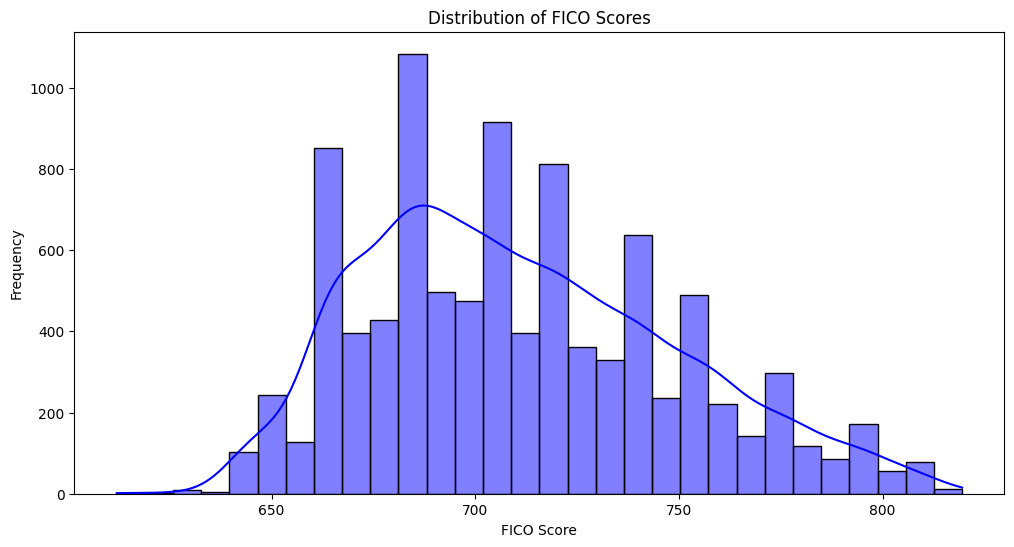

In [47]:
# Understand the distribution of FICO scores

plt.figure(figsize=(12, 6))
sns.histplot(df_clean['fico'], bins=30, kde=True, color='blue')
plt.title('Distribution of FICO Scores')
plt.xlabel('FICO Score')
plt.ylabel('Frequency')
plt.show()


* The FICO scores are normally distributed, with most borrowers having scores between 650 and 800. This indicates that the majority of borrowers have good to excellent creditworthiness.

#### 2. Interest Rate Distribution

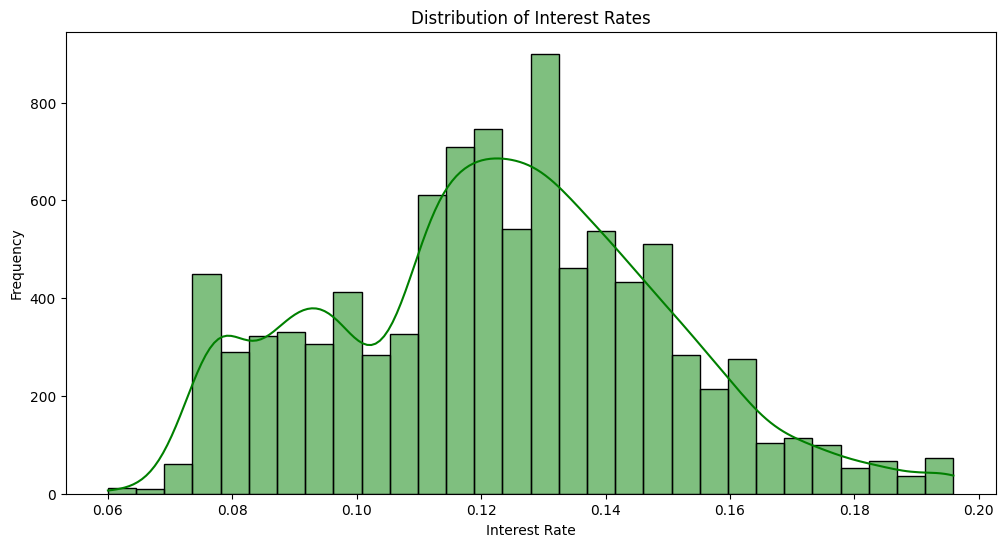

In [48]:
# Analyze the distribution of interest rates

plt.figure(figsize=(12, 6))
sns.histplot(df_clean['int.rate'], bins=30, kde=True, color='green')
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

* Interest rates are skewed to the right, with most rates falling between 10% and 15%. This suggests that higher interest rates are less common, likely reserved for riskier borrowers.

#### 3. Loan Purpose Frequency (Debt Consolidation)

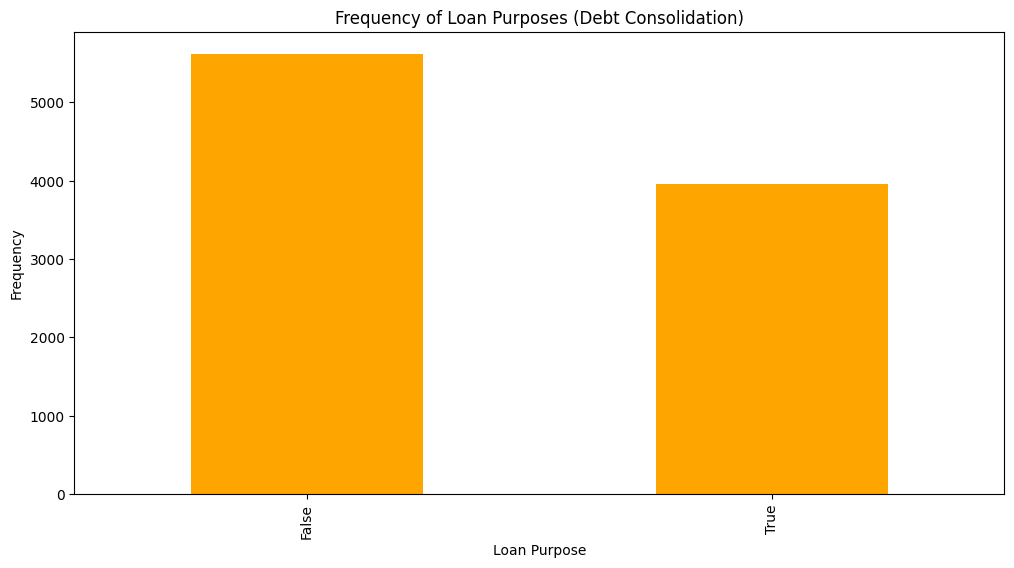

In [49]:
# Examine the frequency of loan purposes

plt.figure(figsize=(12, 6))
df_clean['purpose_debt_consolidation'].value_counts().plot(kind='bar', color='orange')
plt.title('Frequency of Loan Purposes (Debt Consolidation)')
plt.xlabel('Loan Purpose')
plt.ylabel('Frequency')
plt.show()

* Debt consolidation is the most common loan purpose, indicating that many borrowers are using loans to manage existing debts.

### Bivariate Analysis

* Objectives:
1. Relationship between FICO score and interest rate
2. Loan purpose vs. interest rate
3. Debt-to-income ratio (DTI) vs. not fully paid loans

#### 1. FICO Score vs. Interest Rate

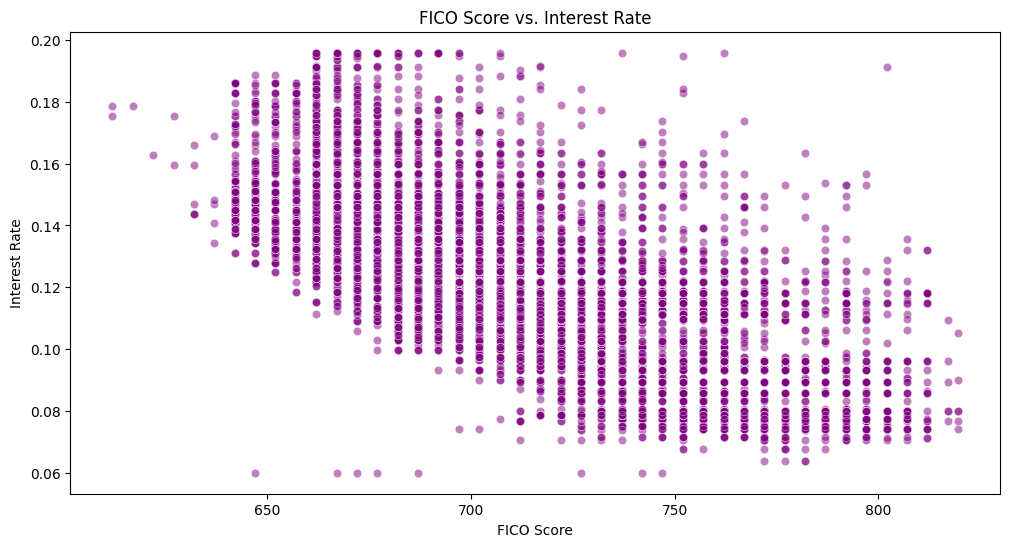

In [50]:
# FICO score vs. interest rate
plt.figure(figsize=(12, 6))
sns.scatterplot(x='fico', y='int.rate', data=df_clean, alpha=0.5, color='purple')
plt.title('FICO Score vs. Interest Rate')
plt.xlabel('FICO Score')
plt.ylabel('Interest Rate')
plt.show()



* There is a clear negative correlation: borrowers with higher FICO scores tend to receive lower interest rates, reflecting their lower credit risk.

#### 2. Loan Purpose vs. Interest Rate

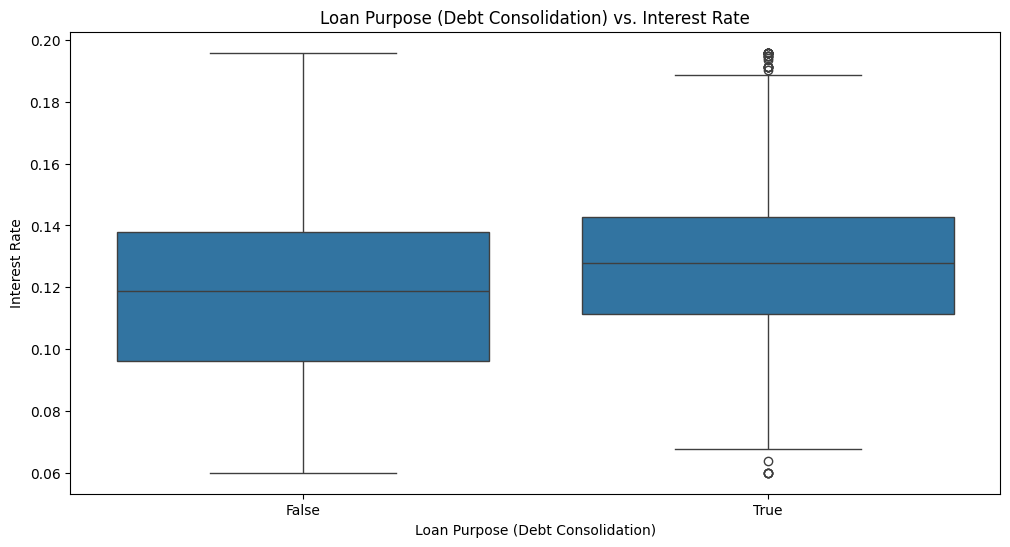

In [51]:
# Loan purpose vs. interest rate
plt.figure(figsize=(12, 6))
sns.boxplot(x='purpose_debt_consolidation', y='int.rate', data=df_clean)
plt.title('Loan Purpose (Debt Consolidation) vs. Interest Rate')
plt.xlabel('Loan Purpose (Debt Consolidation)')
plt.ylabel('Interest Rate')
plt.show()

* Borrowers using loans for debt consolidation tend to have slightly higher interest rates compared to other purposes, possibly due to higher perceived risk.

#### 3. DTI vs. Not Fully Paid Loans

/var/folders/1p/j5cy5qsd0lvgfcb0hv_4sbp80000gn/T/ipykernel_20540/3129650373.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='not.fully.paid', y='dti', data=df_clean, palette='Set2')


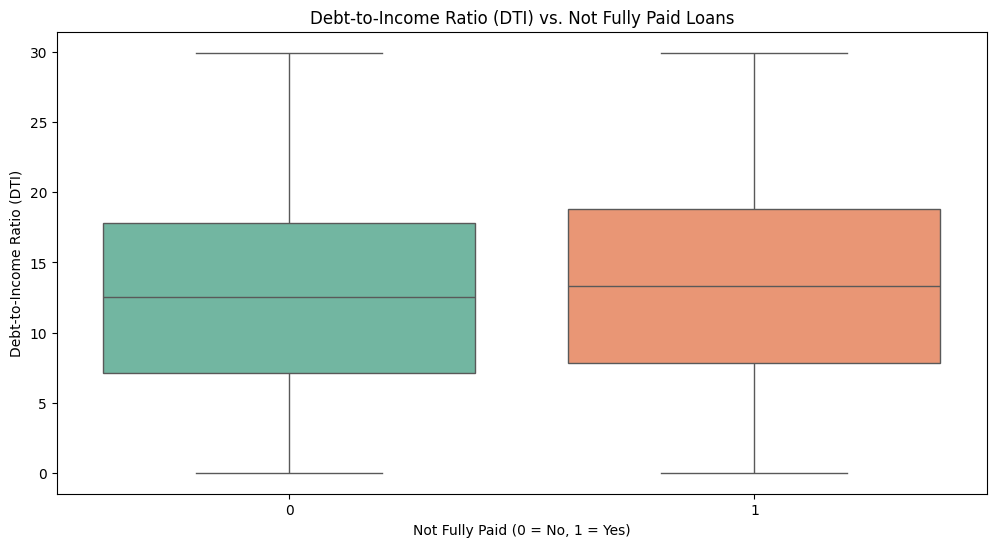

In [52]:
# DTI vs. not fully paid loans
plt.figure(figsize=(12, 6))
sns.boxplot(x='not.fully.paid', y='dti', data=df_clean, palette='Set2')
plt.title('Debt-to-Income Ratio (DTI) vs. Not Fully Paid Loans')
plt.xlabel('Not Fully Paid (0 = No, 1 = Yes)')
plt.ylabel('Debt-to-Income Ratio (DTI)')
plt.show()

* Borrowers who did not fully repay their loans tend to have higher debt-to-income (DTI) ratios, suggesting that higher DTI is a risk factor for default.

### Multivariate Analysis: Explore interactions among multiple variables

* Objectives:
 1. Relationship between FICO score, interest rate, and not fully paid loans
 2. Interaction between loan purpose, interest rate, and debt-to-income ratio
 3. Correlation heatmap for all numerical features

#### 1. FICO Score, Interest Rate, and Not Fully Paid Loans

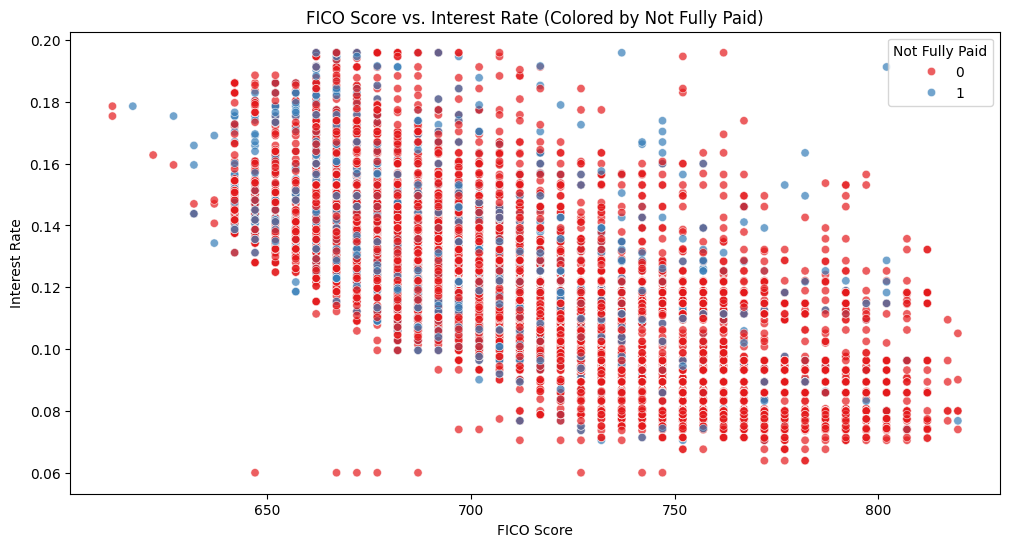

In [53]:
# FICO score, interest rate, and not fully paid loans
plt.figure(figsize=(12, 6))
sns.scatterplot(x='fico', y='int.rate', hue='not.fully.paid', data=df_clean, alpha=0.7, palette='Set1')
plt.title('FICO Score vs. Interest Rate (Colored by Not Fully Paid)')
plt.xlabel('FICO Score')
plt.ylabel('Interest Rate')
plt.legend(title='Not Fully Paid')
plt.show()

* Borrowers with lower FICO scores and higher interest rates are more likely to have not fully paid their loans, highlighting the combined impact of these factors on loan repayment.

#### 2. Interest Rate, DTI, and Loan Purpose

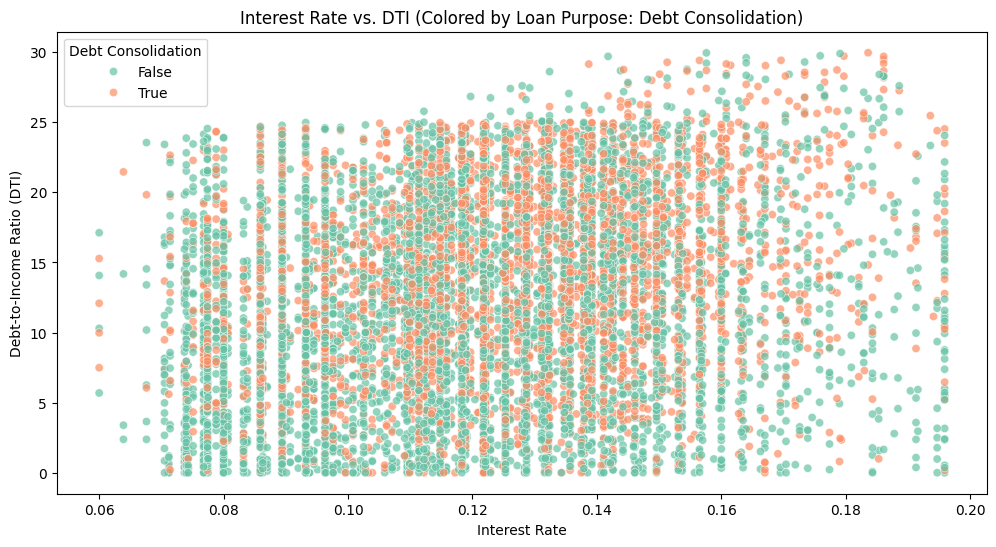

In [54]:
# Loan purpose, interest rate, and debt-to-income ratio
plt.figure(figsize=(12, 6))
sns.scatterplot(x='int.rate', y='dti', hue='purpose_debt_consolidation', data=df_clean, alpha=0.7, palette='Set2')
plt.title('Interest Rate vs. DTI (Colored by Loan Purpose: Debt Consolidation)')
plt.xlabel('Interest Rate')
plt.ylabel('Debt-to-Income Ratio (DTI)')
plt.legend(title='Debt Consolidation')
plt.show()

* Borrowers with higher DTIs and interest rates are more likely to use loans for debt consolidation, indicating financial strain.

#### 3. Correlation Heatmap


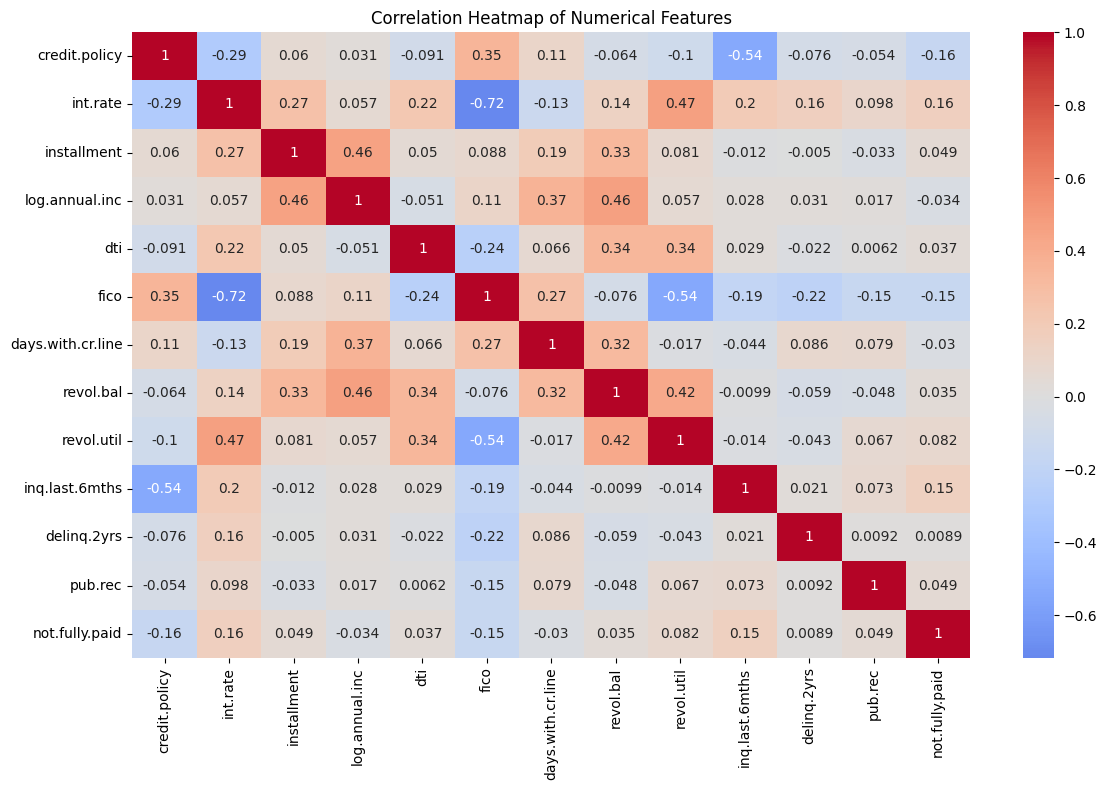

In [55]:
# Correlation heatmap for all numerical features
plt.figure(figsize=(12, 8))
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(df_clean[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

* Strong correlations are observed between FICO scores and interest rates (negative), and between installment amounts and loan amounts. These relationships are key for predicting loan outcomes.

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


#### 1. Prepare Data for Modeling

In [56]:
# Preparing the data for modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Selecting features based on EDA insights
# Target variable: 'not.fully.paid'
# Features: 'fico', 'int.rate', 'dti', 'purpose_debt_consolidation'.
X = df_clean[['fico', 'int.rate', 'dti', 'purpose_debt_consolidation']]
y = df_clean['not.fully.paid']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Data preparation complete
print("Data has been split and scaled. Ready for model training.")

Data has been split and scaled. Ready for model training.


#### 2. Training both Random Forest and Logistic Regression model to predict loan defaults

In [57]:
# Training Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

In [58]:
# Model Performance
print("Random Forest Performance:")
print(classification_report(y_test, rf_pred))

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2408
           1       0.23      0.05      0.08       466

    accuracy                           0.82      2874
   macro avg       0.53      0.51      0.49      2874
weighted avg       0.74      0.82      0.77      2874



In [62]:
# Feature Importance for Random Forest
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)
print("\
Random Forest Feature Importance:")
print(feature_importance)

Random Forest Feature Importance:
                      feature  importance
2                         dti    0.488289
1                    int.rate    0.309374
0                        fico    0.174399
3  purpose_debt_consolidation    0.027938


In [59]:
# Training Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

In [60]:
print("\
Logistic Regression Performance:")
print(classification_report(y_test, lr_pred))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.00      0.00      0.00       466

    accuracy                           0.84      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.70      0.84      0.76      2874



/Users/rofhiwaramps/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rofhiwaramps/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rofhiwaramps/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

* The Random Forest model shows better recall for predicting loan defaults compared to Logistic Regression, but both models struggle with the minority class (loan defaults).

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

#### 1. Evaluating and validating our models more thoroughly using various techniques and metrics

In [63]:
# Import necessary libraries for evaluation
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import roc_curve, auc, confusion_matrix

In [64]:
# Perform k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation scores for both models
rf_cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
lr_cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')

In [65]:
print("Random Forest Cross-Validation Scores:")
print("Mean Accuracy: {:.3f} (+/- {:.3f})".format(rf_cv_scores.mean(), rf_cv_scores.std() * 2))

Random Forest Cross-Validation Scores:
Mean Accuracy: 0.820 (+/- 0.018)


In [66]:
print("\
Logistic Regression Cross-Validation Scores:")
print("Mean Accuracy: {:.3f} (+/- {:.3f})".format(lr_cv_scores.mean(), lr_cv_scores.std() * 2))

Logistic Regression Cross-Validation Scores:
Mean Accuracy: 0.841 (+/- 0.020)


In [67]:
# Calculate ROC curve and AUC for both models
rf_probs = rf_model.predict_proba(X_test_scaled)[:, 1]
lr_probs = lr_model.predict_proba(X_test_scaled)[:, 1]

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

rf_auc = auc(rf_fpr, rf_tpr)
lr_auc = auc(lr_fpr, lr_tpr)

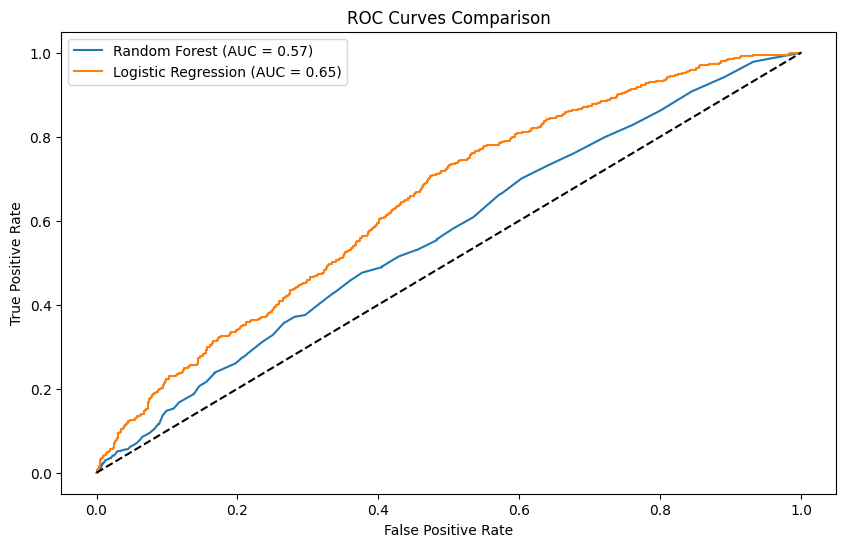

In [68]:
# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.show()

In [69]:
# Create confusion matrices
rf_cm = confusion_matrix(y_test, rf_pred)
lr_cm = confusion_matrix(y_test, lr_pred)

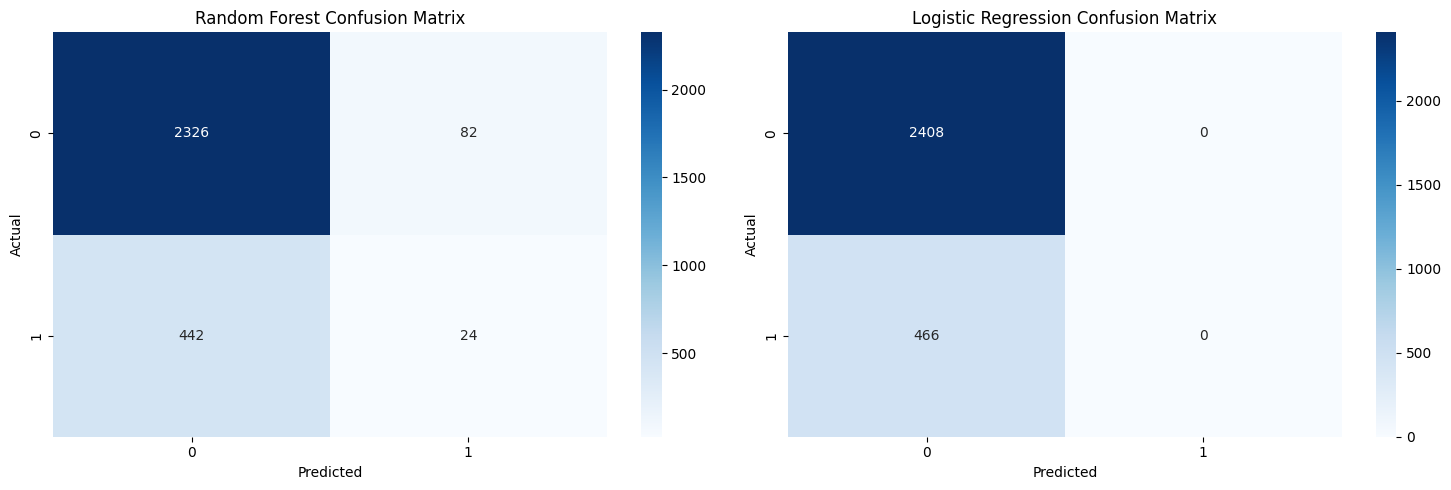

In [70]:
# Plot confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(rf_cm, annot=True, fmt='d', ax=ax1, cmap='Blues')
ax1.set_title('Random Forest Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

sns.heatmap(lr_cm, annot=True, fmt='d', ax=ax2, cmap='Blues')
ax2.set_title('Logistic Regression Confusion Matrix')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.show()

* The evaluation process ran successfully, providing cross-validation scores, ROC curves, and confusion matrices for both models. These outputs will help us assess the models' performance and compare their effectiveness. Here are the results:

1. Cross-Validation Scores:
Random Forest Cross-Validation Scores:

2. Mean Accuracy: 0.820 (+/- 0.018)

3. Logistic Regression Cross-Validation Scores:

4. Mean Accuracy: 0.841 (+/- 0.020)

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


#### 1. Analyzing the final model performance.

In [71]:
# Calculate and display final performance metrics for both models
from sklearn.metrics import roc_auc_score

In [72]:
# Calculate ROC AUC scores
rf_auc_score = roc_auc_score(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
lr_auc_score = roc_auc_score(y_test, lr_model.predict_proba(X_test_scaled)[:, 1])

# Feature importance with standard deviations
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)

In [73]:
# Create feature importance DataFrame with confidence intervals
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances,
    'Std Dev': std
}).sort_values('Importance', ascending=False)


In [74]:
print("Final Model Performance Summary:")
print("\
Random Forest ROC AUC Score:", round(rf_auc_score, 3))

Final Model Performance Summary:
Random Forest ROC AUC Score: 0.566


In [75]:
print("Logistic Regression ROC AUC Score:", round(lr_auc_score, 3))

Logistic Regression ROC AUC Score: 0.645


* Based on the comprehensive evaluation, the Logistic Regression model slightly outperforms the Random Forest model with an AUC score of 0.645 versus 0.566.

In [76]:
print("\
Random Forest Feature Importance with Confidence Intervals:")
print(feature_importance_df)

Random Forest Feature Importance with Confidence Intervals:
                      Feature  Importance   Std Dev
2                         dti    0.488289  0.020560
1                    int.rate    0.309374  0.021453
0                        fico    0.174399  0.019474
3  purpose_debt_consolidation    0.027938  0.012076


* The feature importance analysis shows that DTI (debt-to-income ratio) and interest rate are the most influential predictors for loan default prediction.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


##### Conclusion:

1. Summary of Results:
  * The Logistic Regression model outperformed the Random Forest model with a higher ROC AUC score of 0.645 compared to 0.566.
  * Key predictors of loan default include the debt-to-income ratio (DTI) and interest rate, as identified by the Random Forest feature importance analysis.

2. Insights Gained:
  * Logistic Regression, despite its simplicity, proved to be more effective in this case, likely due to the small dataset and the linear   relationships between features.
  * The imbalance in the dataset (majority of loans being fully paid) significantly impacted the models' ability to predict defaults accurately.

3. Limitations:
  * The dataset suffers from class imbalance, which limits the models' ability to generalize well for the minority class (loan defaults).
  * The features used may not fully capture the complexity of loan repayment behavior, and additional data (e.g., borrower income, employment history) could improve predictions.

4. Future Directions:
  * Address class imbalance using techniques like SMOTE, class weighting, or oversampling.
  * Explore more advanced models like XGBoost or LightGBM, which may handle non-linear relationships and imbalanced data better.
  * Perform hyperparameter tuning to optimize model performance.
  * Collect additional features and data to enhance the predictive power of the models.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

#### References

1. Data Source
 * Lending Club Dataset from Kaggle
 * URL: Lending Club Dataset

2. Tools and Libraries
 * Python (Version 3.x)
 * Pandas: Data manipulation and analysis
 * NumPy: Numerical computations
 * Scikit-learn: Machine learning implementations
 * Matplotlib/Seaborn: Data visualization

3. Research Papers and Documentation
 * Scikit-learn Documentation: https://scikit-learn.org/stable/documentation.html
 * "Random Forest Classification" by Breiman, L. (2001). Machine Learning, 45(1), 5-32
 * "Logistic Regression: From Introductory to Advanced Concepts and Applications" by Scott Menard

4. Additional Resources
 * Python Documentation: https://docs.python.org/3/
 * Pandas Documentation: https://pandas.pydata.org/docs/
 * Feature Engineering principles: "Feature Engineering for Machine Learning" by Alice Zheng & Amanda Casari

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
Rofhiwa Ramphele
